In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from chemevo import oxygen as o

In [2]:
params = {
   'axes.labelsize': 15,
   'font.size': 15,
   'legend.fontsize': 10,
   'xtick.labelsize': 15,
   'ytick.labelsize': 15,
   'text.usetex': True, #to use TeX in your labels
   'font.family':'serif',
   'axes.titlesize': 15
   }
rcParams.update(params)

colors = ["#0072B2", "#E69F00", "#009E73", "#D55E00", "#CC79A7", "#F0E442"]

In [3]:
eta = 2.5
m_o_cc = 0.015
r = 0.4
tau_star = 1 #Gyr
tau_dep = 0.323 #Gyr
tau_sfh = 6 #Gyr

# 1) Constant SFR

In [4]:
t_array = np.linspace(0,8,100)
M_g_array_const = np.ones(len(t_array))
analytical_Z_O_const = o.Z_o_const_sfr(t_array, m_o_cc, eta, r, tau_dep)
numerical_Z_O_const = o.solve_for_Z_o(t_array, M_g_array_const, tau_dep, m_o_cc, tau_star)
eq_Z_O_const = o.Z_o_eq_const(m_o_cc, eta, r)

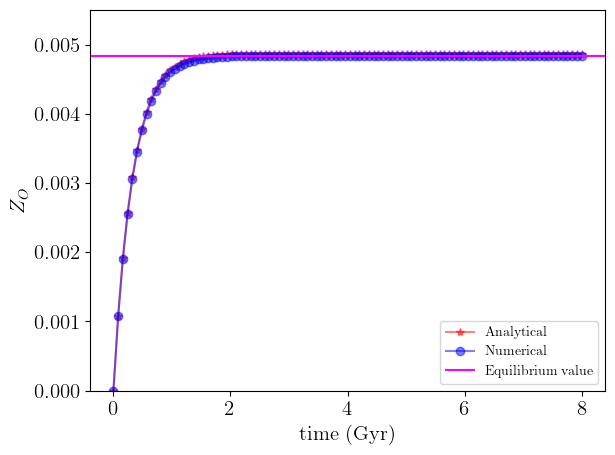

In [5]:
plt.plot(t_array, numerical_Z_O_const, color = 'red', marker='*', label = 'Analytical', alpha = 0.5)
plt.plot(t_array, analytical_Z_O_const, color = 'blue', marker = 'o', label = 'Numerical', alpha = 0.5)
plt.axhline(eq_Z_O_const, color = 'magenta', label = 'Equilibrium value')
#plt.axhline(0.5, color = 'magenta', label = 'Equilibrium value')

plt.ylim(0,0.0055)
plt.legend()
plt.xlabel('time (Gyr)')
plt.ylabel(r'$Z_{O}$')
plt.tight_layout()
plt.show()

# Exponential SFR

$M_{g}(t) = M_{g,0}e^{t/\tau_{sfh}}$


In [6]:
t_array = np.linspace(0,8,100)
M_g_0 = 1
M_g_array_exp = M_g_0 * np.exp(-t_array/tau_sfh)

analytical_Z_O_exp = o.Z_o_exp_sfr(t_array, m_o_cc, eta, r, tau_dep, tau_star, tau_sfh)
numerical_Z_O_exp = o.solve_for_Z_o(t_array, M_g_array_exp, tau_dep, m_o_cc, tau_star)
eq_Z_O_exp = o.Z_o_eq_exp(m_o_cc, eta, r, tau_star, tau_sfh)

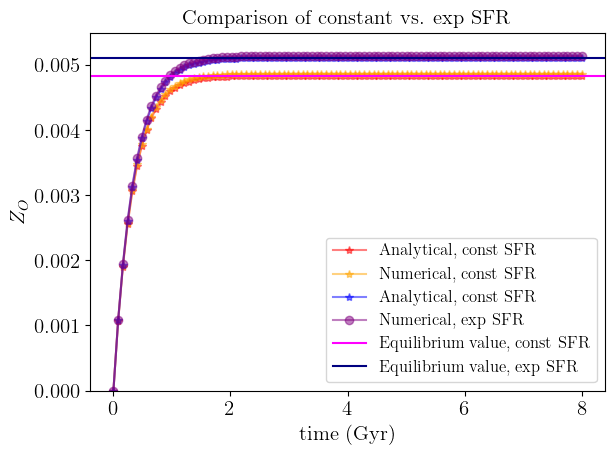

In [7]:
plt.plot(t_array, analytical_Z_O_const, color = 'red', marker='*', label = 'Analytical, const SFR', alpha = 0.5)
plt.plot(t_array, numerical_Z_O_const, color = 'orange', marker='*', label = 'Numerical, const SFR', alpha = 0.5)
plt.plot(t_array, analytical_Z_O_exp, color = 'blue', marker='*', label = 'Analytical, const SFR', alpha = 0.5)
plt.plot(t_array, numerical_Z_O_exp, color = 'purple', marker = 'o', label = 'Numerical, exp SFR', alpha = 0.5)

plt.axhline(eq_Z_O_const, color = 'magenta', label = 'Equilibrium value, const SFR')
plt.axhline(eq_Z_O_exp, color = 'navy', label = 'Equilibrium value, exp SFR')


plt.ylim(0,0.0055)
plt.legend(fontsize = 12)
plt.xlabel('time (Gyr)')
plt.ylabel(r'$Z_{O}$')
plt.title("Comparison of constant vs. exp SFR")
plt.tight_layout()
plt.show()

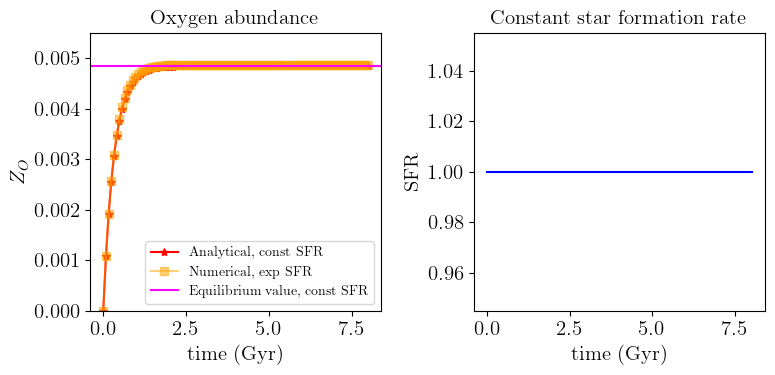

In [8]:
plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
plt.plot(t_array, analytical_Z_O_const, color = 'red', marker='*', label = 'Analytical, const SFR', alpha = 1)
plt.plot(t_array, numerical_Z_O_const, color = 'orange', marker = 's', label = 'Numerical, exp SFR', alpha = 0.5)

plt.axhline(eq_Z_O_const, color = 'magenta', label = 'Equilibrium value, const SFR')


plt.ylim(0,0.0055)
plt.legend()
plt.xlabel('time (Gyr)')
plt.ylabel(r'$Z_{O}$')
plt.title("Oxygen abundance")
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.plot(t_array, M_g_array_const, color = 'blue')

plt.xlabel('time (Gyr)')
plt.ylabel('SFR')
plt.title("Constant star formation rate")
plt.tight_layout()
plt.show()

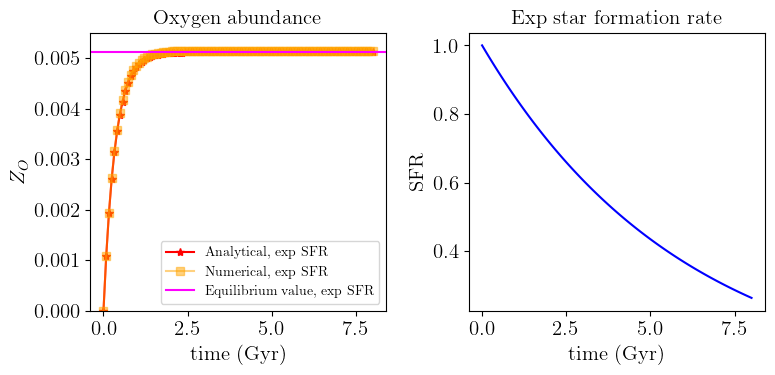

In [9]:
plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
plt.plot(t_array, analytical_Z_O_exp, color = 'red', marker='*', label = 'Analytical, exp SFR', alpha = 1)
plt.plot(t_array, numerical_Z_O_exp, color = 'orange', marker = 's', label = 'Numerical, exp SFR', alpha = 0.5)

plt.axhline(eq_Z_O_exp, color = 'magenta', label = 'Equilibrium value, exp SFR')


plt.ylim(0,0.0055)
plt.legend()
plt.xlabel('time (Gyr)')
plt.ylabel(r'$Z_{O}$')
plt.title("Oxygen abundance")
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.plot(t_array, M_g_array_exp, color = 'blue')


plt.xlabel('time (Gyr)')
plt.ylabel('SFR')
plt.title("Exp star formation rate")
plt.tight_layout()
plt.show()

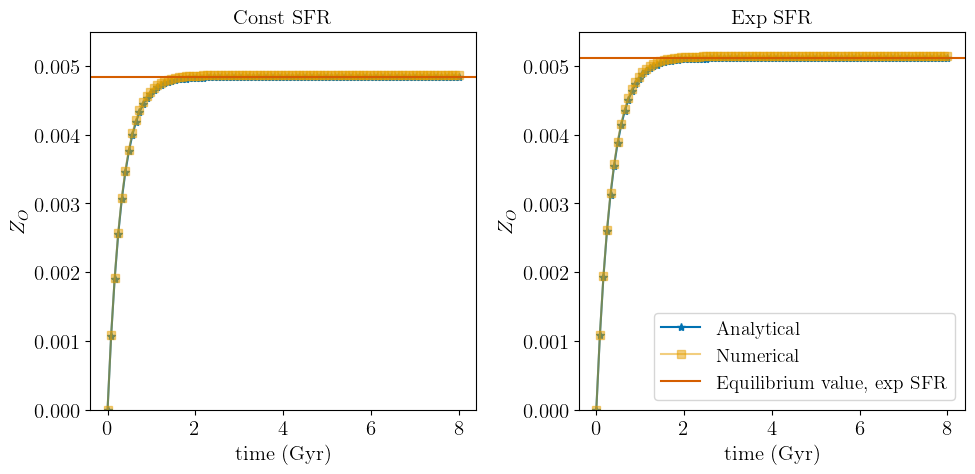

In [10]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(t_array, analytical_Z_O_const, color = colors[0], marker='*', label = 'Analytical', alpha = 1)
plt.plot(t_array, numerical_Z_O_const, color = colors[1], marker = 's', label = 'Numerical', alpha = 0.5)

plt.axhline(eq_Z_O_const, color = colors[3], label = 'Equilibrium value, const SFR')


plt.ylim(0,0.0055)
plt.xlabel('time (Gyr)')
plt.ylabel(r'$Z_{O}$')
plt.title("Const SFR")
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.plot(t_array, analytical_Z_O_exp, color = colors[0], marker='*', label = 'Analytical', alpha = 1)
plt.plot(t_array, numerical_Z_O_exp, color = colors[1], marker = 's', label = 'Numerical', alpha = 0.5)

plt.axhline(eq_Z_O_exp, color = colors[3], label = 'Equilibrium value, exp SFR')


plt.ylim(0,0.0055)
plt.legend(fontsize = 14)
plt.xlabel('time (Gyr)')
plt.ylabel(r'$Z_{O}$')
plt.title("Exp SFR")
plt.tight_layout()

plt.savefig("O_const_exp.png", dpi=300)

In [11]:
import numpy as np

# Time array and g(t)
t = np.linspace(1, 10, 10)
g = np.linspace(2, 30, 10)

# Initial condition
m = np.zeros_like(t)   # store m(t)
m[0] = 0.0             # initial value

# Euler forward integration
for i in range(1, len(t)):
    dt = t[i] - t[i-1]
    m[i] = m[i-1] + dt * (3 * g[i-1] + m[i-1])

print("t:", t)
print("m:", m)


t: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
m: [0.00000000e+00 6.00000000e+00 2.73333333e+01 7.93333333e+01
 1.92666667e+02 4.28666667e+02 9.10000000e+02 1.88200000e+03
 3.83533333e+03 7.75133333e+03]


In [12]:
eta = 2.5
m_o_cc = 0.015
r = 0.4
tau_star = 1 #Gyr
tau_dep = 0.323 #Gyr
tau_sfh = 6 #Gyr

In [13]:
t_array = np.linspace(0,8,1000)
n_steps = len(t_array)
dt = t_array[1]-t_array[0]
m_o_cc_arr = np.ones(n_steps) * m_o_cc
eta_arr = np.ones(n_steps) * eta
r_arr = np.ones(n_steps) * r
tau_star_arr = np.ones(n_steps) * tau_star

m_g_array = np.ones(n_steps)
m_O = np.zeros(n_steps)

for i in range(1, n_steps):
    m_O[i] = dt*((m_o_cc_arr[i-1] * m_g_array[i-1]/tau_star_arr[i-1]) - ((1 + eta_arr[i-1] - r_arr[i-1])/tau_star_arr[i-1] * m_O[i-1])) + m_O[i-1]

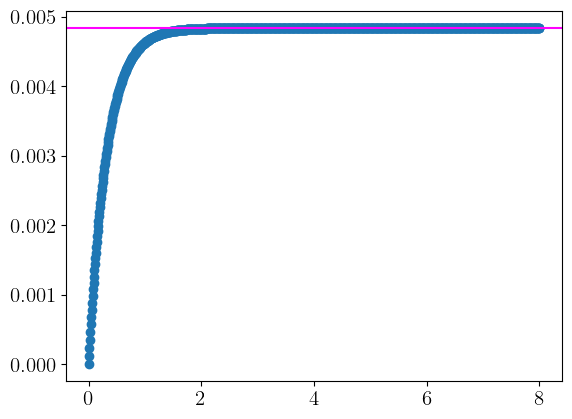

In [14]:
#plt.plot(t_array, numerical_Z_O_const, color = 'red', marker='*', label = 'Analytical', alpha = 0.5)
#plt.plot(t_array, analytical_Z_O_const, color = 'blue', marker = 'o', label = 'Numerical', alpha = 0.5)
plt.axhline(eq_Z_O_const, color = 'magenta', label = 'Equilibrium value')

plt.scatter(t_array, m_O)

In [15]:
from chemevo import evolution as evo

In [16]:
t_array = np.linspace(0,10,1000)
model = evo.Galaxy(t_array, m_o_cc=0.015, eta=2.5, r=0.4, tau_star=1)
m_g_array = np.ones(len(t_array))
M_oxygen = model.integrate_m_O(m_g_array=m_g_array)
Z_oxygen = model.compute_z_O(m_g_array)

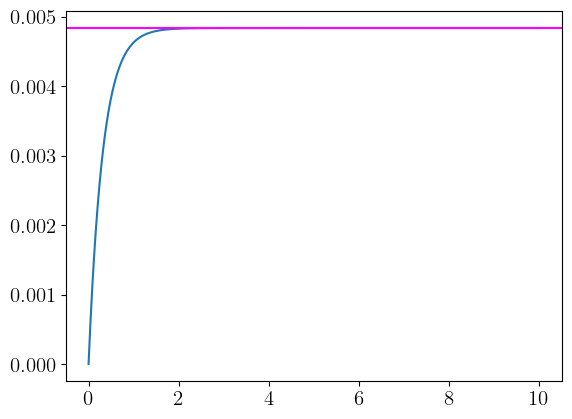

In [17]:
plt.plot(t_array, Z_oxygen)
plt.axhline(eq_Z_O_const, color = 'magenta', label = 'Equilibrium value')


In [19]:
z_Iron = model.integrate_m_Fe(m_g_array=m_g_array)

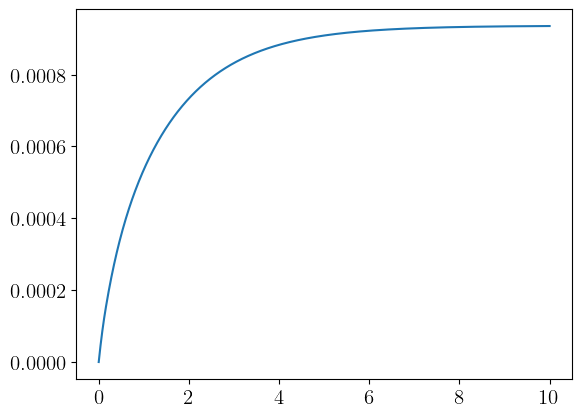

In [20]:
plt.plot(t_array, z_Iron)